In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_supermarket = pd.read_json('supermarket.json')

In [5]:
print(df_supermarket.head)

<bound method NDFrame.head of                                                lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...>


In [6]:
def extrair_dados_loja_mes(loja_id,mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None

In [7]:
extrair_dados_loja_mes(5,12)

{'mes': 12,
 'faturamento': {'higiene_e_saude': 13600,
  'limpeza': 19900,
  'bebidas': 8100,
  'carne_e_laticinios': 4900,
  'alimentacao': 5100},
 'gastos_funcionarios': 32000,
 'despesas_fornecedores': 27000,
 'gastos_diversos': 10500}

In [8]:
def extrair_faturamento_loja_mes(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:
                        faturamento = sum(dados_mensais['faturamento'].values())
                    return faturamento
    return None

In [16]:
print('Faturamento Mensal: R$ ')
extrair_faturamento_loja_mes(1,1)

Faturamento Mensal: R$ 


53800

In [37]:

def extrair_faturamento_loja_ano(loja_id):
    faturamento_anual = 0
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                faturamento_anual += sum(dados_mensais['faturamento'].values())
            return faturamento_anual
    return None

In [39]:
print('Faturamento Anual: R$ ')
extrair_faturamento_loja_ano(1)

Faturamento Anual: R$ 


644800

In [43]:
def extrair_loja_loja_mes(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:
                        faturamento = sum(dados_mensais['faturamento'].values())
                        gastos = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                        lucro = faturamento - gastos
                    return lucro
    return None

In [45]:
print('Lucro Mensal: R$ ')
extrair_loja_loja_mes(1,1)

Lucro Mensal: R$ 


13800

In [55]:

def extrair_lucro_loja_ano(loja_id):
    lucro_anual = 0
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes = sum(dados_mensais['faturamento'].values())
                gastos_mes = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                lucro_anual += (faturamento_mes - gastos_mes)
            return lucro_anual
    return None

In [56]:
print('Lucro Anual: R$ ')
extrair_lucro_loja_ano(5)

Lucro Anual: R$ 


-54500

In [91]:
for i in range(1,6):
    print(extrair_faturamento_loja_ano(i))
    print(extrair_lucro_loja_ano(i))

644800
26200
643000
48400
637500
-127500
633600
-88900
614500
-54500


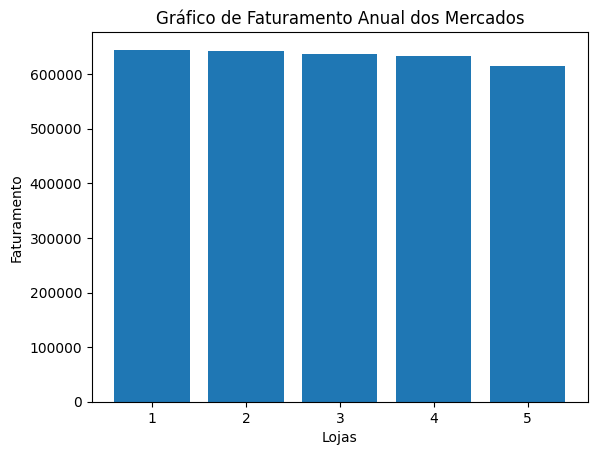

In [93]:
lojas = range (1,6)
faturamento = []
for i in lojas:
    faturamento.append(extrair_faturamento_loja_ano(i))


plt.bar(lojas, faturamento)  # Plotar gráfico de barra usando os dados de categorias e valores
plt.title('Gráfico de Faturamento Anual dos Mercados')  # Definir título do gráfico
plt.xlabel('Lojas')  # Definir rótulo do eixo x
plt.ylabel('Faturamento')  # Definir rótulo do eixo y
plt.show()  # Mostrar o gráfico

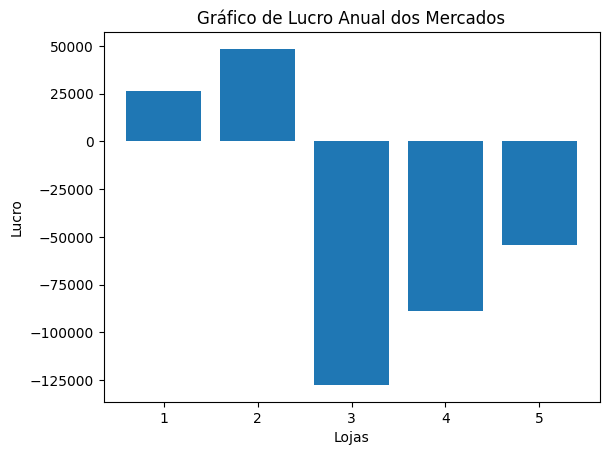

In [108]:
lojas = range (1,6)
lucro = []
for i in lojas:
    lucro.append(extrair_lucro_loja_ano(i))

plt.bar(lojas, lucro)  # Plotar gráfico de barra usando os dados de categorias e valores
plt.title('Gráfico de Lucro Anual dos Mercados')  # Definir título do gráfico
plt.xlabel('Lojas')  # Definir rótulo do eixo x
plt.ylabel('Lucro')  # Definir rótulo do eixo y
plt.show()  # Mostrar o gráfico